In [27]:
# SDA Term Project
# 60201673 박건우, 60201674 박상재, 60191556 이재훈

# Import Module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Font for Korean
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data Load
data1 = 'seoulAirQuality.csv'
air = pd.read_csv(data1 , encoding = 'CP949')

air

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-12-31 23:00,평균,21.0,9.0
1,2021-12-31 23:00,강남구,21.0,9.0
2,2021-12-31 23:00,강동구,25.0,7.0
3,2021-12-31 23:00,강북구,23.0,12.0
4,2021-12-31 23:00,강서구,28.0,9.0
...,...,...,...,...
456137,2020-01-01 0:00,용산구,12.0,13.0
456138,2020-01-01 0:00,은평구,18.0,12.0
456139,2020-01-01 0:00,종로구,20.0,15.0
456140,2020-01-01 0:00,중구,22.0,18.0


In [29]:
# Data Preprocessing
import numpy as np

# Rename Columns
air.rename(columns = {"일시" : "date", "구분" : "district", "미세먼지(PM10)" : "PM10", "초미세먼지(PM25)" : "PM25"}, inplace = True)

# 'date' 열이 날짜 형식이 아니라면 변환
air['date'] = pd.to_datetime(air['date'])

# 'month'와 'day' 열이 없다면 'date' 열을 기반으로 생성
air['month'] = air['date'].apply(lambda x: x.month)
air['day'] = air['date'].apply(lambda x: x.day)

# 'month'와 'day' 열의 데이터 타입이 숫자가 아니거나 결측값이 있다면 변환 또는 처리
air[['month', 'day']] = air[['month', 'day']].apply(pd.to_numeric, errors='coerce')

# 'season' 열 생성
conditions_season = [
    (air['month'] >= 3) & (air['month'] <= 5),
    (air['month'] >= 6) & (air['month'] <= 8),
    (air['month'] >= 9) & (air['month'] <= 11),
    (air['month'] == 12) | (air['month'] == 1) | (air['month'] == 2)
]

choices_season = ['spring', 'summer', 'autumn', 'winter']

air['season'] = np.select(conditions_season, choices_season, default=np.nan)
air

,date,district,PM10,PM25,month,day,season
0,2021-12-31 23:00:00,평균,21.0,9.0,12,31,winter
1,2021-12-31 23:00:00,강남구,21.0,9.0,12,31,winter
2,2021-12-31 23:00:00,강동구,25.0,7.0,12,31,winter
3,2021-12-31 23:00:00,강북구,23.0,12.0,12,31,winter
4,2021-12-31 23:00:00,강서구,28.0,9.0,12,31,winter
...,...,...,...,...,...,...,...
456137,2020-01-01 00:00:00,용산구,12.0,13.0,1,1,winter
456138,2020-01-01 00:00:00,은평구,18.0,12.0,1,1,winter
456139,2020-01-01 00:00:00,종로구,20.0,15.0,1,1,winter
456140,2020-01-01 00:00:00,중구,22.0,18.0,1,1,winter


In [33]:
from scipy import stats
from scipy.stats import shapiro, bartlett

# 계절별 데이터 분리
spring_pm10 = air[air['season'] == 'spring']['PM10']
summer_pm10 = air[air['season'] == 'summer']['PM10']
autumn_pm10 = air[air['season'] == 'autumn']['PM10']
winter_pm10 = air[air['season'] == 'winter']['PM10']

# 계절별 PM10 결측지제거
spring_pm10 = air[air['season'] == 'spring']['PM10'].dropna()
summer_pm10 = air[air['season'] == 'summer']['PM10'].dropna()
autumn_pm10 = air[air['season'] == 'autumn']['PM10'].dropna()
winter_pm10 = air[air['season'] == 'winter']['PM10'].dropna()

# 랜덤 샘플링을 위한 seed 설정 (재현성을 위해)
np.random.seed(0)

# 각 계절별로 PM10, PM25 데이터에서 100개씩 무작위 추출
spring_pm10_sample = spring_pm10.sample(n=100)
summer_pm10_sample = summer_pm10.sample(n=100)
autumn_pm10_sample = autumn_pm10.sample(n=100)
winter_pm10_sample = winter_pm10.sample(n=100)


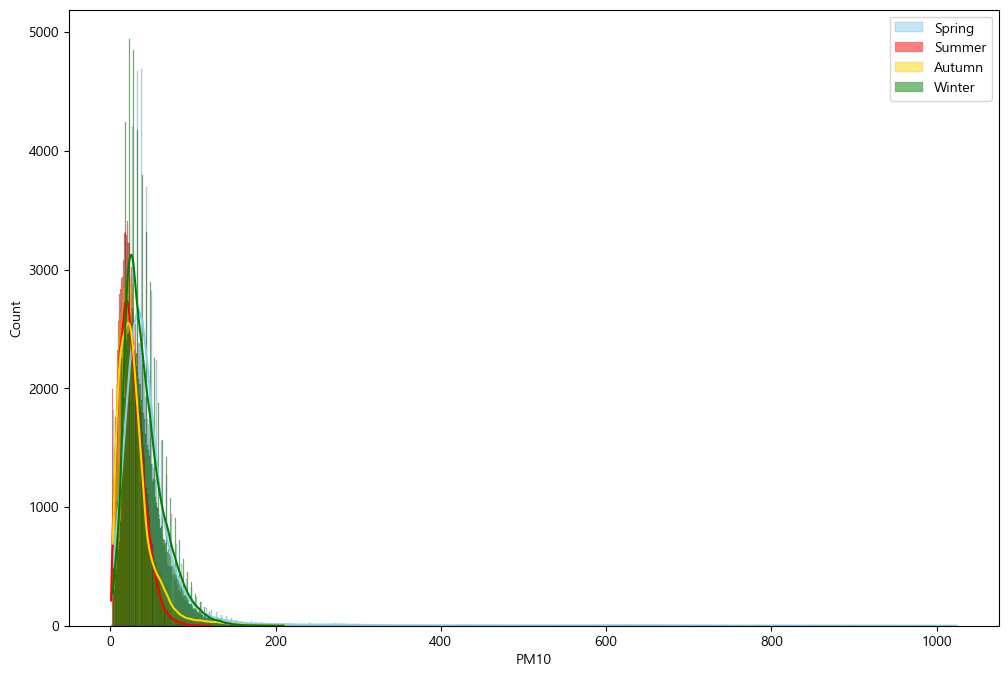

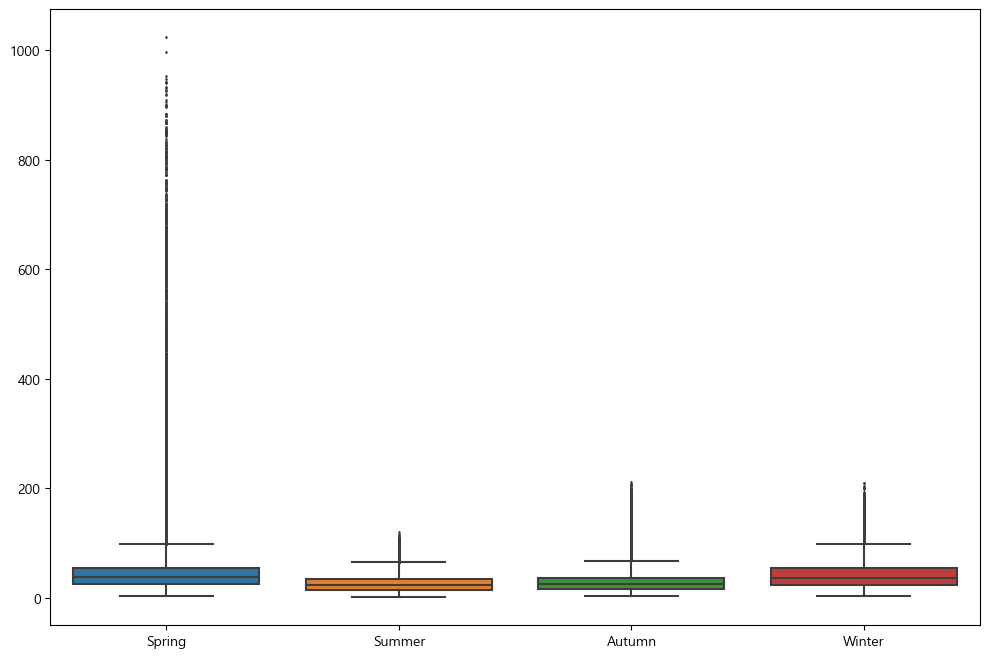

In [36]:
# 계절별 PM10 히스토그램 그리기
plt.figure(figsize=(12,8))
sns.histplot(spring_pm10, color="skyblue", label="Spring", kde=True)
sns.histplot(summer_pm10, color="red", label="Summer", kde=True)
sns.histplot(autumn_pm10, color="gold", label="Autumn", kde=True)
sns.histplot(winter_pm10, color="green", label="Winter", kde=True)
plt.legend()
plt.show()

# 계절별 PM10 박스플롯 그리기
plt.figure(figsize=(12,8))
sns.boxplot(data=[spring_pm10, summer_pm10, autumn_pm10, winter_pm10], fliersize=1)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()


In [37]:
# PM10 값이 100 이상인 행 제거
air_filtered = air[air['PM10'] < 100]

# 계절별 PM10 데이터 분리
spring_pm10_filter = air_filtered[air_filtered['season'] == 'spring']['PM10'].dropna()
summer_pm10_filter = air_filtered[air_filtered['season'] == 'summer']['PM10'].dropna()
autumn_pm10_filter = air_filtered[air_filtered['season'] == 'autumn']['PM10'].dropna()
winter_pm10_filter = air_filtered[air_filtered['season'] == 'winter']['PM10'].dropna()

# 랜덤 샘플링을 위한 seed 설정 (재현성을 위해)
np.random.seed(0)

# 각 계절별로 PM10, PM25 데이터에서 100개씩 무작위 추출
spring_pm10_Fsample = spring_pm10_filter.sample(n=100)
summer_pm10_Fsample = summer_pm10_filter.sample(n=100)
autumn_pm10_Fsample = autumn_pm10_filter.sample(n=100)
winter_pm10_Fsample = winter_pm10_filter.sample(n=100)

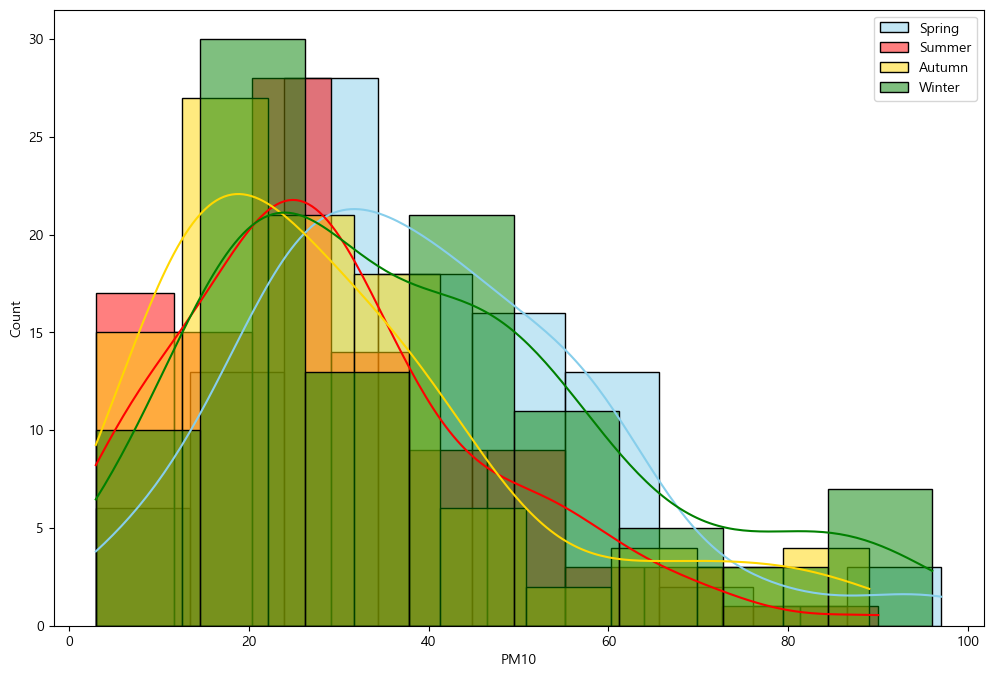

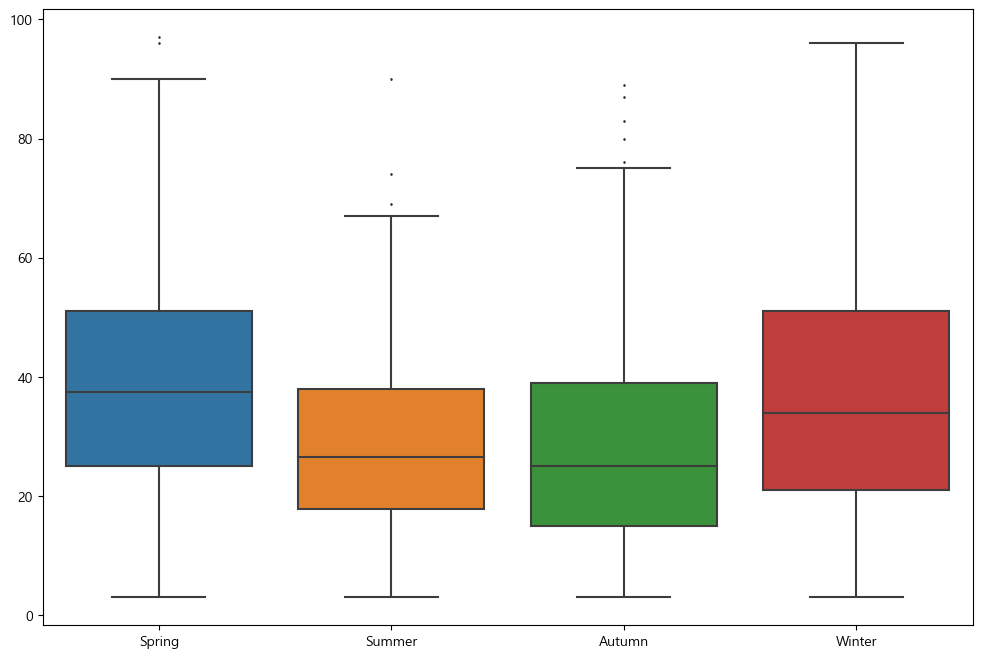

In [43]:
# 계절별 PM10 히스토그램 그리기
plt.figure(figsize=(12,8))
sns.histplot(spring_pm10_Fsample, color="skyblue", label="Spring", kde=True)
sns.histplot(summer_pm10_Fsample, color="red", label="Summer", kde=True)
sns.histplot(autumn_pm10_Fsample, color="gold", label="Autumn", kde=True)
sns.histplot(winter_pm10_Fsample, color="green", label="Winter", kde=True)
plt.legend()
plt.show()

# 계절별 PM10 박스플롯 그리기
plt.figure(figsize=(12,8))
sns.boxplot(data=[spring_pm10_Fsample, summer_pm10_Fsample, autumn_pm10_Fsample, winter_pm10_Fsample], fliersize=1)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()




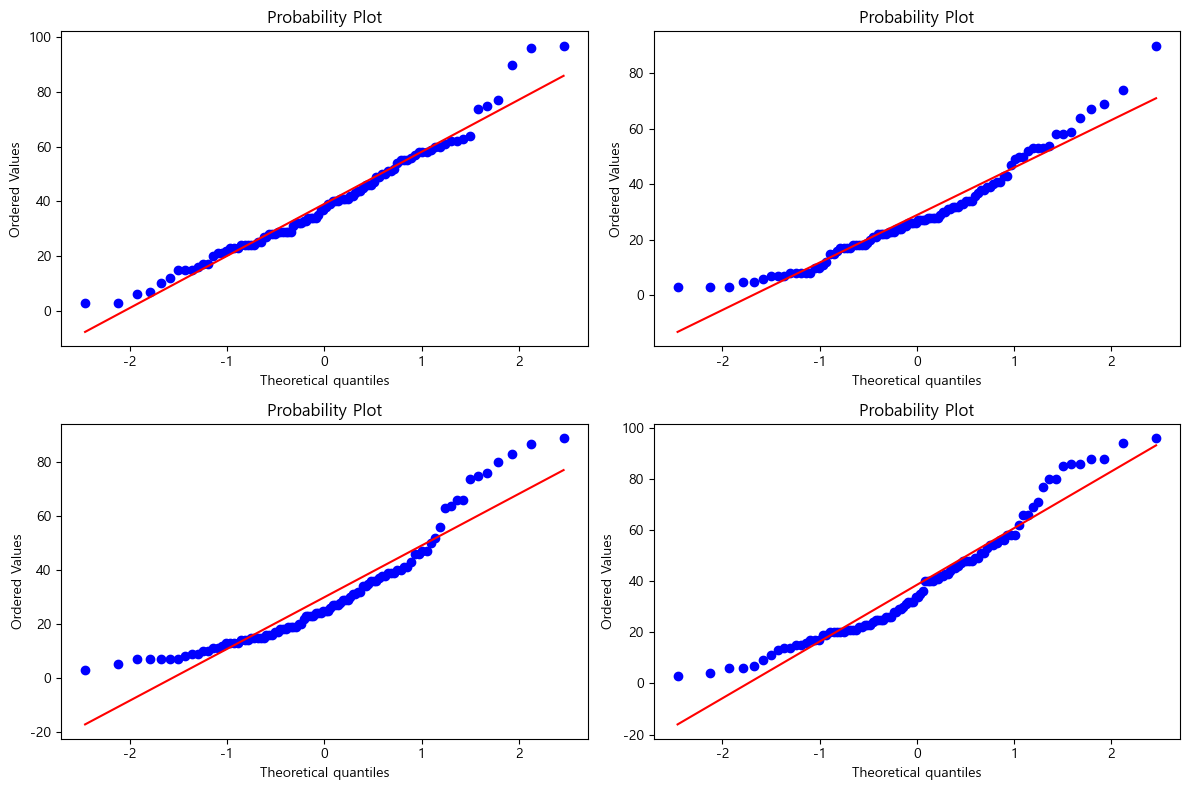

In [44]:
# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# spring_pm10_Fsample 데이터 분포 시각화
axes[0, 0].set_title('Spring_pm10_Fsample 분포')
stats.probplot(spring_pm10_Fsample, dist=stats.norm, plot=axes[0, 0])

# summer_pm10_Fsample 데이터 분포 시각화
axes[0, 1].set_title('Summer_pm10_Fsample 분포')
stats.probplot(summer_pm10_Fsample, dist=stats.norm, plot=axes[0, 1])

# autumn_pm10_Fsample 데이터 분포 시각화
axes[1, 0].set_title('Autumn_pm10_Fsample 분포')
stats.probplot(autumn_pm10_Fsample, dist=stats.norm, plot=axes[1, 0])

# winter_pm10_Fsample 데이터 분포 시각화
axes[1, 1].set_title('Winter_pm10_Fsample 분포')
stats.probplot(winter_pm10_Fsample, dist=stats.norm, plot=axes[1, 1])

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [46]:
# 정규성 검사
_, pval_spring_pm10 = stats.shapiro(spring_pm10_Fsample)
_, pval_summer_pm10 = stats.shapiro(summer_pm10_Fsample)
_, pval_autumn_pm10 = stats.shapiro(autumn_pm10_Fsample)
_, pval_winter_pm10 = stats.shapiro(winter_pm10_Fsample)
print("PM10 - Spring p-value: {}, Summer p-value: {}, Autumn p-value: {}, Winter p-value: {}".format(pval_spring_pm10, pval_summer_pm10, 
                                                                                                     pval_autumn_pm10, pval_winter_pm10))

# 등분산성 검사
_, pval_pm10 = stats.levene(spring_pm10_Fsample, summer_pm10_Fsample, autumn_pm10_Fsample, winter_pm10_Fsample)

print("PM10 - levene test p-value: {}".format(pval_pm10))


# kruskal 테스트 수행
fval_pm10, pval_pm10 = stats.kruskal(spring_pm10_Fsample, summer_pm10_Fsample, autumn_pm10_Fsample, winter_pm10_Fsample)
print(f"PM10 - F value: {fval_pm10}, p-value: {pval_pm10}")


PM10 - Spring p-value: 0.016413681209087372, Summer p-value: 0.0003560489567462355, Autumn p-value: 4.0753101870905084e-07, Winter p-value: 0.00019408491789363325
PM10 - levene test p-value: 0.051526649867137606
PM10 - F value: 25.326146481910644, p-value: 1.3196333258487624e-05


In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
all_pm10 = np.concatenate([spring_pm10_Fsample, summer_pm10_Fsample, autumn_pm10_Fsample, winter_pm10_Fsample])

# 각 데이터에 대한 그룹 정보 생성
groups = np.repeat(['Spring', 'Summer', 'Autumn', 'Winter'], len(spring_pm10_Fsample))

# pairwise_tukeyhsd 수행
posthoc = pairwise_tukeyhsd(endog=all_pm10, groups=groups, alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Autumn Spring     9.16 0.0064   1.9367 16.3833   True
Autumn Summer    -1.01 0.9839  -8.2333  6.2133  False
Autumn Winter     8.62 0.0119   1.3967 15.8433   True
Spring Summer   -10.17 0.0018 -17.3933 -2.9467   True
Spring Winter    -0.54 0.9975  -7.7633  6.6833  False
Summer Winter     9.63 0.0036   2.4067 16.8533   True
-----------------------------------------------------


In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 계절 범주를 더미 변수로 변환
df_dummies = pd.get_dummies(air['season'], drop_first = True)

# 더미 변수들을 데이터프레임에 추가
air = pd.concat([air, df_dummies], axis=1)

# 모델 구축
# 기준 범주인 '가을'은 모델에 이미 포함되어 있으므로 명시하지 않음.
model = ols('PM10 ~ spring + summer + winter', data=air).fit()

# 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:59:57   Log-Likelihood:            -2.2141e+06
No. Observations:              446550   AIC:                         4.428e+06
Df Residuals:                  446546   BIC:                         4.428e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.1995      0.104    291.

In [50]:
# 겨울 - 봄 구간과 여름 - 가을 구간을 더미 변수로 재설정 후 regression 진행
air['snw'] = air['season'].apply(lambda x : 1 if x in ['spring', 'winter'] else 0)

# model 구축
model2 = ols('PM10 ~ snw', data = air).fit()

# 결과 요약
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                 2.718e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:00:01   Log-Likelihood:            -2.2157e+06
No. Observations:              446550   AIC:                         4.431e+06
Df Residuals:                  446548   BIC:                         4.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2290      0.073    385.710      0.0

In [51]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

air_filtered = air[air['PM10'] < 100]

# 모델 구축
# 기준 범주인 '가을'은 모델에 이미 포함되어 있으므로 명시하지 않음.
model = ols('PM10 ~ spring + summer + winter', data=air_filtered).fit()

# 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:00:03   Log-Likelihood:            -1.8830e+06
No. Observations:              435085   AIC:                         3.766e+06
Df Residuals:                  435081   BIC:                         3.766e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.2222      0.056    506.

In [52]:
# 겨울 - 봄 구간과 여름 - 가을 구간을 더미 변수로 재설정 한 regression model 구축
model2 = ols('PM10 ~ snw', data = air_filtered).fit()

# 결과 요약
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                 4.842e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:00:05   Log-Likelihood:            -1.8833e+06
No. Observations:              435085   AIC:                         3.767e+06
Df Residuals:                  435083   BIC:                         3.767e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2245      0.039    697.160      0.0